<a href="https://colab.research.google.com/github/BradleyAgwa/WEEK-9-IP/blob/main/Spam_Filter_Brad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**SPAM EMAIL PREDICTION**

## 1.0 Defining the Question

Predict whether an e-mail is spam or not.

## 1.2 Understanding The Context

Spam email,is an email sent without explicit consent from the recipient. Spam emails usually try to sell questionable goods or are downright deceitful.

This analysis seeks to come up with a model that can accurately identify a spam email and classify it as such.

## 1.3 The Experimental Design

- Load and preview the data set
- Prepare the data
- Perform Exploratory Data Analysis i.e Univariate, Bivariate and Multivariate analysis
- Train the model (K-Nearest-Neighbors)
- Evaluate and optimize the model (Cross-validation & Feature Reduction)
- Draw conclusions and make recommendations

## 2.0 Data Understanding

### Importing Libraries

In [33]:
# Importing Libraries

import numpy as np
np.random.seed(999)
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from pprint import pprint
pprint(mnb.get_params)
import warnings
warnings.filterwarnings('ignore')

<bound method BaseEstimator.get_params of MultinomialNB()>


### Loading the datasets

In [48]:
# loading the dataset
name_file = []
with open('/content/spambase.names') as f:
    name_file = f.read()

name_file

name_split = name_file.split(sep='\n')
name_split[33:]

name_cols = []
for line in name_split[33:]:
    matched = re.split(r':.*$', line)
    name_cols.append(matched[0])

name_cols = name_cols[:-1]
name_cols.append('spam')
base = pd.read_csv('/content/spambase.data', names =name_cols )

In [6]:
# Previewing the head of the dataset

base.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [7]:
# Previewing bottom of the dataset

base.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
4596,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4597,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4598,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4599,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4600,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [49]:
# Creating a copy of the dataframe, I'll use this later on.

base1=base.copy();

In [8]:
# Shape of the data

base.shape

(4601, 58)

In [9]:
# Dataset info and data types

base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

## 3.0 Data Cleaning

In [10]:
# Checking for duplicates

base.duplicated().sum()

391

In [11]:
# Remove duplicated
base.drop_duplicates(inplace=True)

# Recheck for duplicates
base.duplicated().sum()

0

In [12]:
# Checking for null values

base.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

We have no null values

In [13]:
# Checking for outliers

Q1 = base.quantile(0.25)
Q3 = base.quantile(0.75)
IQR = Q3 -Q1
outliers = base[((base < (Q1 - 1.5 * IQR)) |(base> (Q3 + 1.5 * IQR))).any(axis=1)]
outliers.shape

(4096, 58)

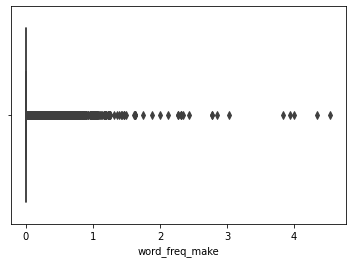

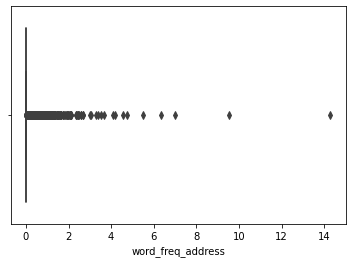

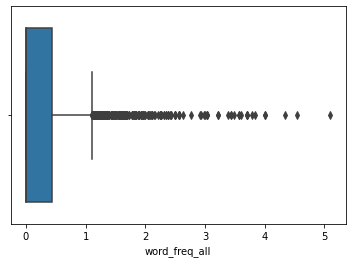

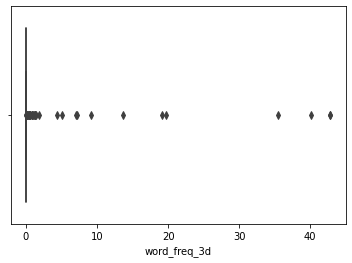

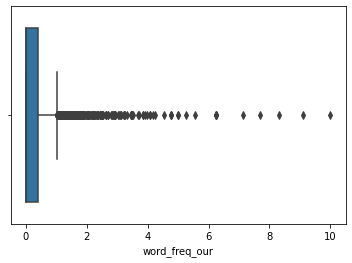

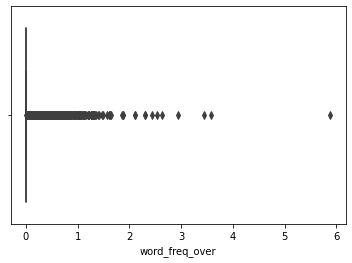

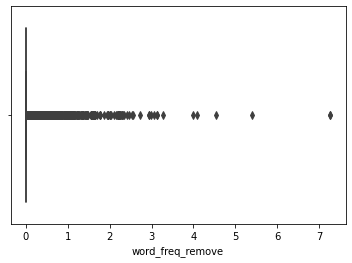

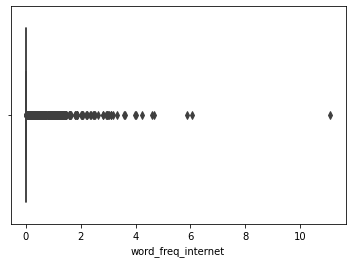

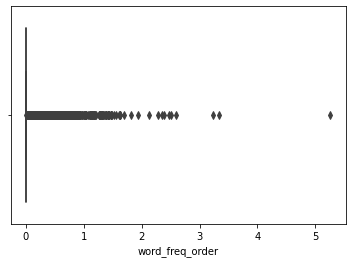

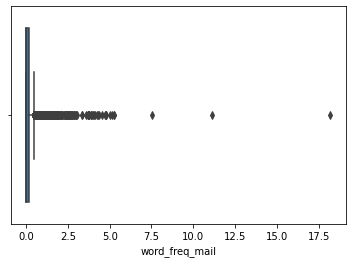

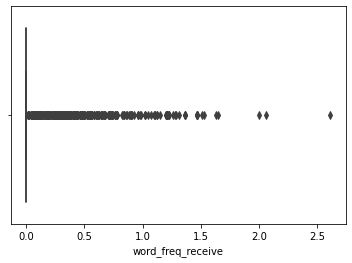

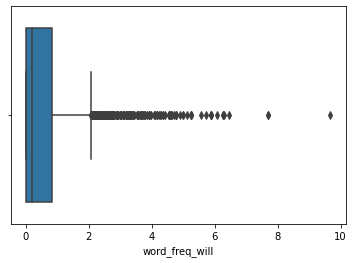

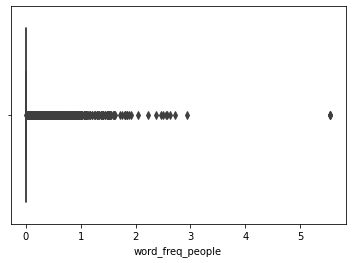

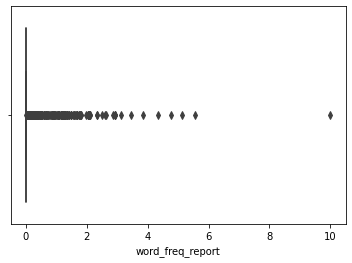

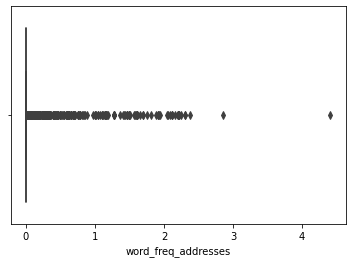

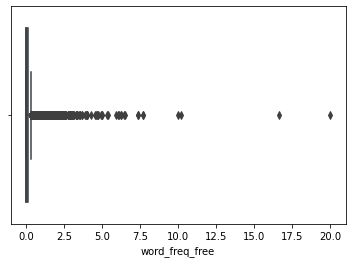

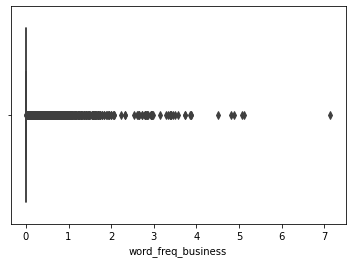

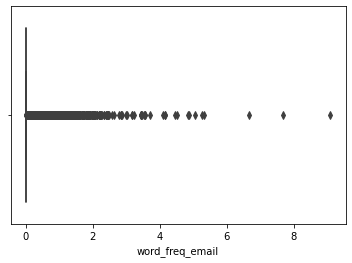

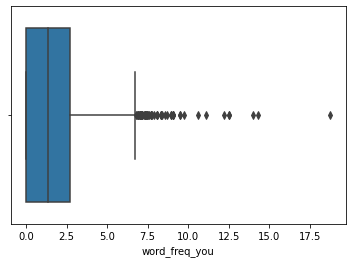

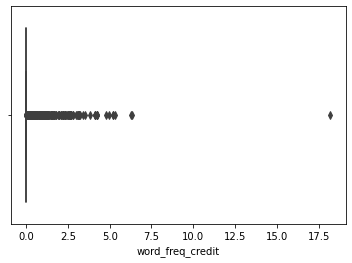

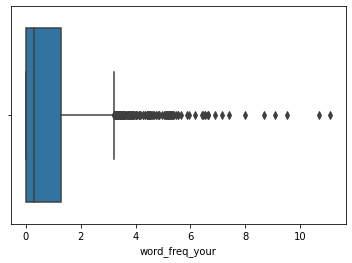

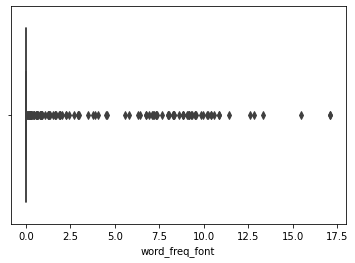

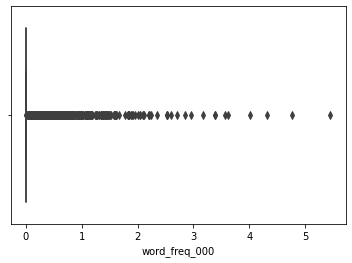

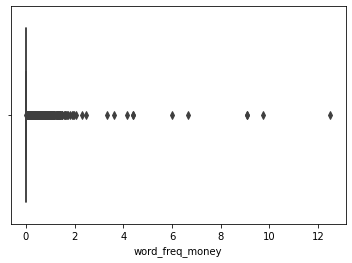

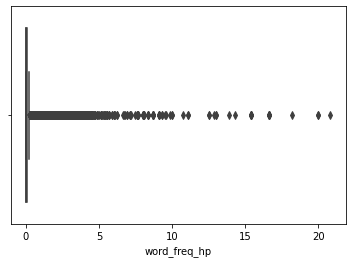

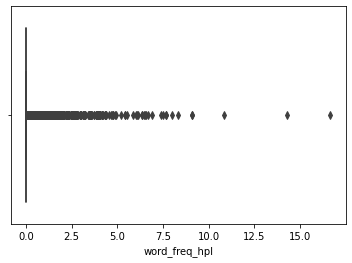

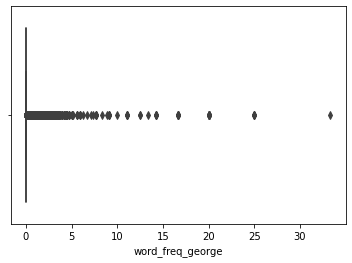

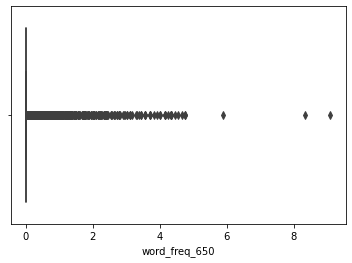

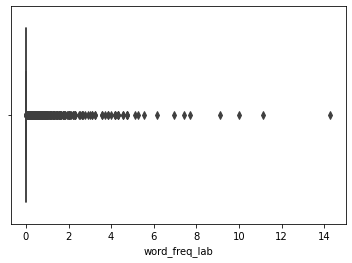

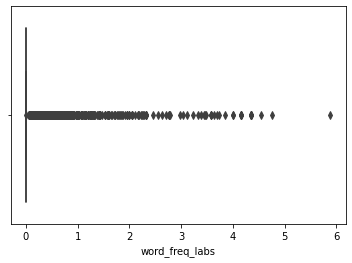

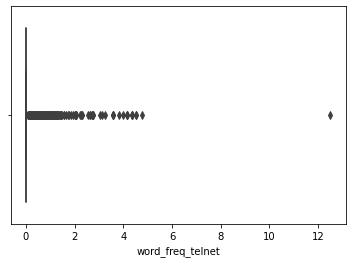

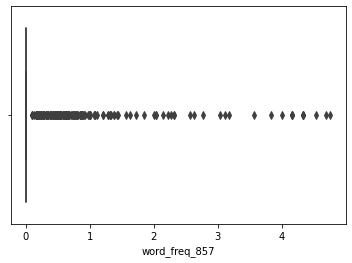

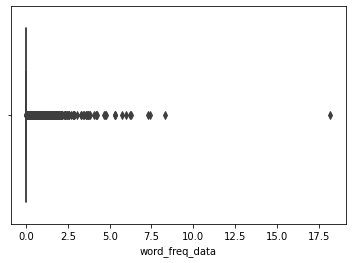

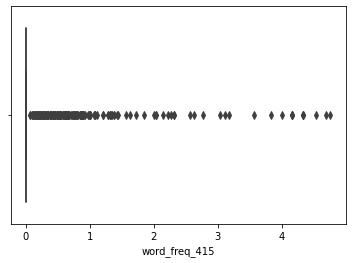

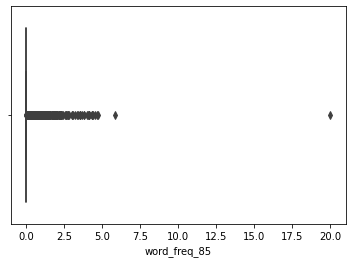

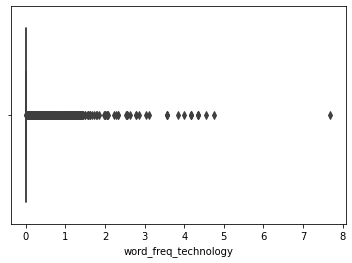

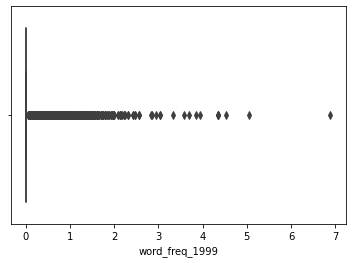

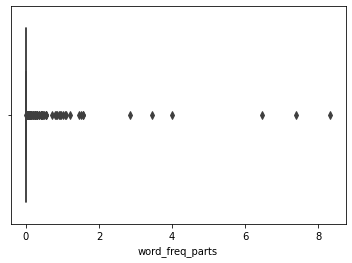

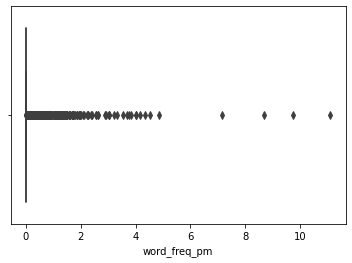

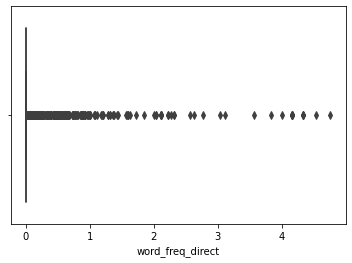

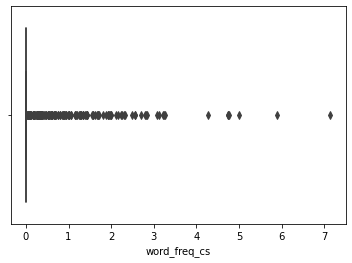

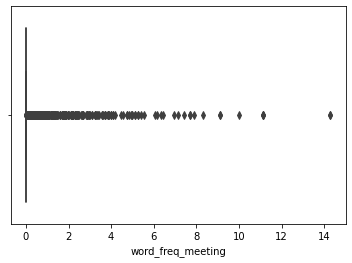

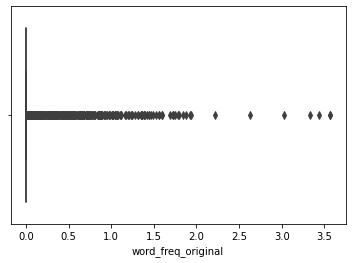

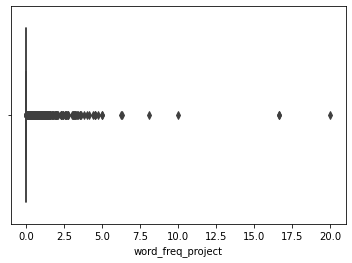

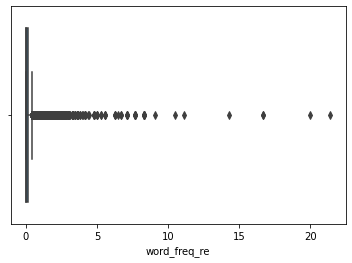

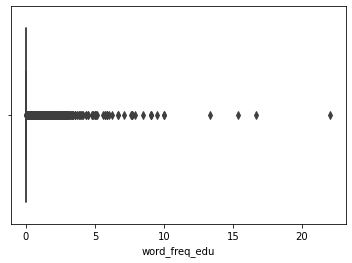

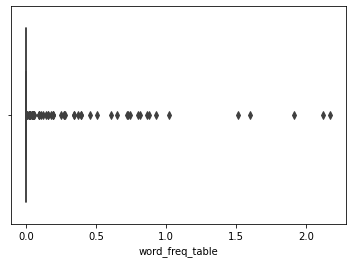

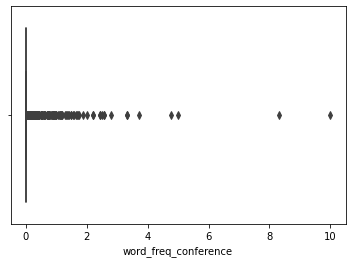

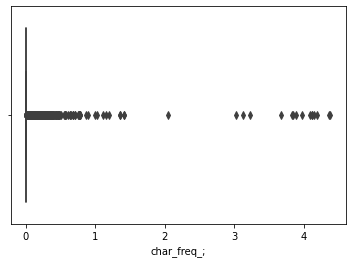

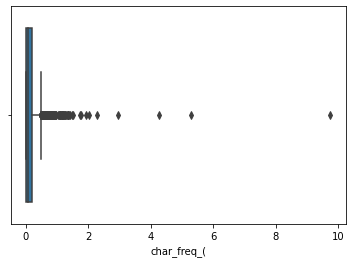

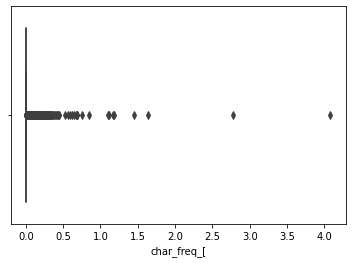

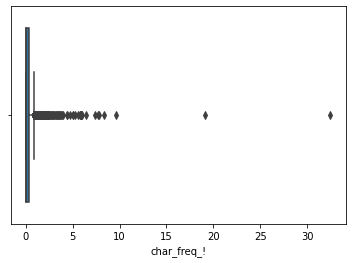

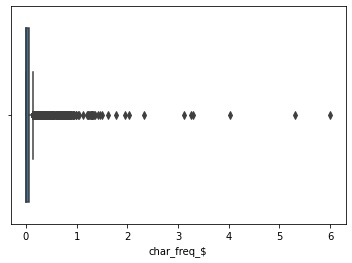

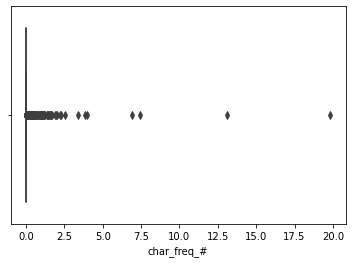

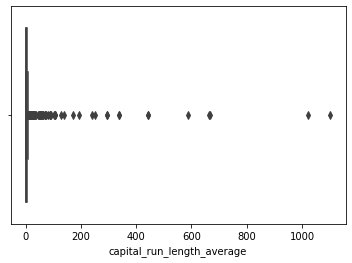

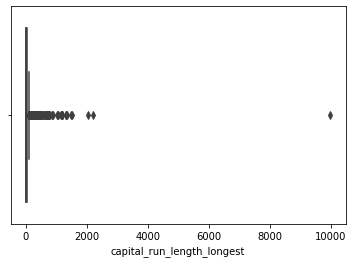

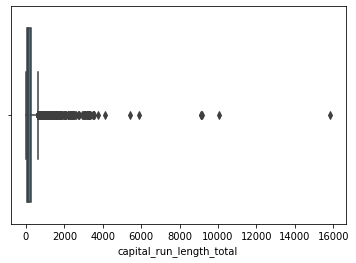

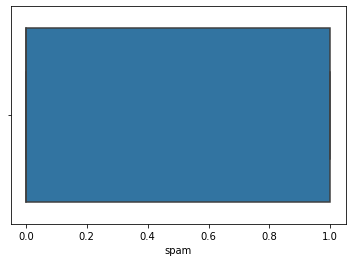

In [14]:
# Box plot of outliers

for i, col in enumerate(base.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=base)
    plt.show()

In [15]:
# Checking for the number of unique values in each column

base.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

## 4.0 Exploratory Data Analysis

#### Univariate Analysis

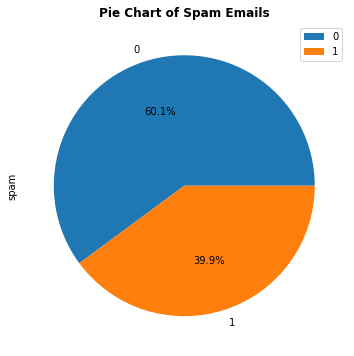

In [16]:
# Pie chart of the spam emails

base['spam'].value_counts().plot(kind='pie', autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Spam Emails', y=1, fontweight='bold')
plt.show()

From the pie chart, we can tell that 60.1% of the emails are not spam while 39.9% are spam emails.

In [17]:
# First we will verify whether the features are normally distriibuted or not.

# Using the shapiro test, we will test the for normality on the features of our data
# Use a for loop to iterate through all the columns systematically.

# Importing the shapiro function
from scipy.stats import shapiro 

for i in base.columns:
# Testing for normality
  stat, p = shapiro(base[i])             

# Interpreting the results
alpha = 0.05
if p > alpha:
    print('Sample is Gaussian')
else:
    print('Sample does not look Gaussian')

Sample does not look Gaussian


In [18]:
# Preview the total number of mpam and non-spam emails
spams = base['spam'].value_counts()
spams

0    2531
1    1679
Name: spam, dtype: int64

2531 are not spam while 1679 are spam

## 5.0 Modelling

### Naive Bayes Model

In [27]:
# Define the x and y features
X = base.iloc[:, :-1]
y = base.iloc[:,-1]

# We wil then scale the data usind standard scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Transform data
X = scaler.fit_transform(X,y)

# Model performance comparison dataframe
column_names = ['Model','test_size', 'Accuracy']
comparison = pd.DataFrame(columns = column_names)

##### Spliting our data 80-20

In [29]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)
# 

# Training our model
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = mnb.predict(X_test)
# 

# Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("MultinomialNB  accuracy using 20% as test size =", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB', 'test_size':20, 'Accuracy':accuracy_score(y_test,y_pred)}
# Append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)


 [[503  17]
 [ 69 253]]

               precision    recall  f1-score   support

           0       0.88      0.97      0.92       520
           1       0.94      0.79      0.85       322

    accuracy                           0.90       842
   macro avg       0.91      0.88      0.89       842
weighted avg       0.90      0.90      0.90       842

MultinomialNB  accuracy using 20% as test size = 0.8978622327790974


Using 20% of the data as the test size gives an accuracy of 89.78%. Out of the 842 emails predicted, 756 were accurate predictions.

##### Spliting our data 70-30

In [31]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)
# 

# Training our model
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = mnb.predict(X_test)
# 

# Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("MultinomialNB  accuracy using 30% as test size =", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB', 'test_size':30, 'Accuracy':accuracy_score(y_test,y_pred)}
# Append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)


 [[737  31]
 [ 98 397]]

               precision    recall  f1-score   support

           0       0.88      0.96      0.92       768
           1       0.93      0.80      0.86       495

    accuracy                           0.90      1263
   macro avg       0.91      0.88      0.89      1263
weighted avg       0.90      0.90      0.90      1263

MultinomialNB  accuracy using 30% as test size = 0.8978622327790974


Using 30% of the data as the test size gives an accuracy of 89.78%. Out of the 1263 emails predicted, 1134 were accurate predictions.

##### Spliting our data 60-40

In [32]:
# Splitting the data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.4, random_state=50)
# 

# Training our model
from sklearn.naive_bayes import MultinomialNB  
mnb = MultinomialNB().fit(X_train, y_train)
# 
# Predicting our test predictors

y_pred = mnb.predict(X_test)
# 

# Model performance
from sklearn.metrics import accuracy_score , confusion_matrix,classification_report
import scipy.stats as stats

print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("MultinomialNB  accuracy using 40% as test size =", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB', 'test_size':40, 'Accuracy':accuracy_score(y_test,y_pred)}
# Append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)


 [[972  36]
 [157 519]]

               precision    recall  f1-score   support

           0       0.86      0.96      0.91      1008
           1       0.94      0.77      0.84       676

    accuracy                           0.89      1684
   macro avg       0.90      0.87      0.88      1684
weighted avg       0.89      0.89      0.88      1684

MultinomialNB  accuracy using 40% as test size = 0.8853919239904988


Using 40% of the data as the test size gives an accuracy of 88.54%. Out of the 1684 emails predicted, 1494 were accurate predictions.

### Tuning The Model

In [34]:
# Splitting the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

mnb = MultinomialNB()

params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

# complement_nb_grid = GridSearchCV(ComplementNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
# complement_nb_grid.fit(X_digits,Y_digits)

clf = GridSearchCV(mnb, param_grid=params, n_jobs=-1, cv=30, verbose=5)
grid_model = clf.fit(X_train, y_train)
print("\nBest Score: ", clf.best_score_)
print("\nBest Params: ", clf.best_params_)

# Predicting x using the gid search best params

y_pred = grid_model.predict(X_test)
# 

# Model performance


print('\n',confusion_matrix(y_test, y_pred))
print('\n',classification_report(y_test, y_pred))
print("\nMultinomialNB  accuracy using grid search\n =", accuracy_score(y_test,y_pred))

model_name = {'Model':'MultinomialNB_gridsearch', 'test_size':20, 'Accuracy':accuracy_score(y_test,y_pred)}
#append row to the dataframe
comparison = comparison.append(model_name, ignore_index=True)

Fitting 30 folds for each of 5 candidates, totalling 150 fits

Best Score:  0.8919168773704172

Best Params:  {'alpha': 0.01}

 [[503  17]
 [ 65 257]]

               precision    recall  f1-score   support

           0       0.89      0.97      0.92       520
           1       0.94      0.80      0.86       322

    accuracy                           0.90       842
   macro avg       0.91      0.88      0.89       842
weighted avg       0.91      0.90      0.90       842


MultinomialNB  accuracy using grid search
 = 0.9026128266033254


Tuning with grid search gives an accuracy of 90.26%. Out of the 842 emails predicted, 760 were accurate predictions.

### Gaussian Naive Bayes

In [39]:
# Splitting the data into dependent and independent sets.
X = base.drop('spam', axis = 1)
y = base['spam']

# Splitting our data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data

norm = Normalizer().fit(X)

In [40]:
#
gnb = GaussianNB()  
model = gnb.fit(X_train, y_train)
y_pred= model.predict(X_test)
# Evaluating the predictions made by the model

#  Using Classification report
print(classification_report(y_test, y_pred))

# Using  the accuracy score
print(confusion_matrix(y_test, y_pred))
print('Gaussian Naive Bayes accuracy :',accuracy_score(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.97      0.76      0.85       483
           1       0.75      0.97      0.84       359

    accuracy                           0.85       842
   macro avg       0.86      0.86      0.85       842
weighted avg       0.88      0.85      0.85       842

[[365 118]
 [ 11 348]]
Gaussian Naive Bayes accuracy : 0.8467933491686461


The Gaussian Naive Bayes model attains an accuracy of 84.67%.

### Bernoulli Naive Bayes

In [41]:
# train, test and spliting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 55)

# Training the model.
# Splitting the data into train and test sets

bnb = BernoulliNB().fit(X_train, y_train)

# Predicting
y_pred2 = bnb.predict(X_test)

# Evaluating the predictions made by the model

# Using Classification report
print(classification_report(y_test, y_pred2))


# Using  the accuracy score
print(confusion_matrix(y_test, y_pred2))
print('Bernoulli Naive Bayes accuracy :',accuracy_score(y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       479
           1       0.89      0.84      0.86       363

    accuracy                           0.88       842
   macro avg       0.89      0.88      0.88       842
weighted avg       0.88      0.88      0.88       842

[[441  38]
 [ 59 304]]
Bernoulli Naive Bayes accuracy : 0.8847980997624703


The Bernoulli Naive Bayes model attains an accuracy of 88.47%, which is a higher accuracy than the Gaussian Naive Bayes model.

## 6.0 Challenging The Solution

In [51]:
from sklearn.svm import SVC

# Selecting the independent variables and the target variable
x = base1.drop('spam', axis = 1)
y = base1['spam']

# models for iteration
#
poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of models and model names 
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
# Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
  
# Feature scaling 
  from sklearn.preprocessing import StandardScaler
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
# Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
# Accuracy of the model
  f1 = f1_score(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)
  
  return accuracy, f1, model

for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, x, y)[0]}and the f1 score is: {predictor(model, x, y)[1]} ')

The accuracy score of Polynomial is: 0.7741585233441911and the f1 score is: 0.6413793103448276 
The accuracy score of Linear     is: 0.9120521172638436and the f1 score is: 0.8924302788844622 
The accuracy score of Rbf        is: 0.9283387622149837and the f1 score is: 0.911764705882353 


The Rbf model perfomed best with an accuracy score of 92.83% followed by the Linear model with an accuracy of 91.20%, the Polynomial falling behind with an accuracy score of 77.42%.

## 7.0 Conclusion

* The best performing model was the multinomial with grid search to get the best parameters. It gave an accuracy of 90.26%.


* Changing the sample size did not affect the model performance untill the test sicze of 40% was used, which reduced the accuracy.

* When  challenging the solution,the kernel that performmed best was the Rbf with an accuracy score of 92.83%.

## 8.0 Recommendation

In order to achieve the highest accuracy score when it comes to prediciting whether an email is spam or not in our spambase dataset, I would recommend the following steps:

* Use a MultinomialNB classifier as it is best suited for text classification problems. Gaussian on the other hand works best with data that follows a normal distribution.

* When predicting whether an email is a spam email or not, the Rbf model is recommended to attain more accurate predictions.